In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


## Import all the library

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


## Load the data

In [ ]:
def load_data(path):
  imgpath = list(paths.list_images(dataset))
  data=[]
  labels=[]
  for i in imgpath:
    label = i.split("/")[-2]
    labels.append(label)
    image = load_img(i, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)
  data = np.array(data,dtype='float32')
  labels=np.array(labels)
  return data,labels


In [ ]:
dataset = "/content/gdrive/MyDrive/data/"
X,Y = load_data(dataset)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


## Shape of the data

In [ ]:
X.shape,Y.shape
  

((7553, 224, 224, 3), (7553,))

## Unique values in the data

In [ ]:
unique_val,no_of_val=np.unique(Y, return_counts = True)
print("unique values in labels is :- ",unique_val)
print("no on occurrence of the value is :- ",no_of_val)
print("Total no of unique classes are :- ",np.size(unique_val, axis=None))

unique values in labels is :-  ['with_mask' 'without_mask']
no on occurrence of the value is :-  [3725 3828]
Total no of unique classes are :-  2


## graphical visualization of unique values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


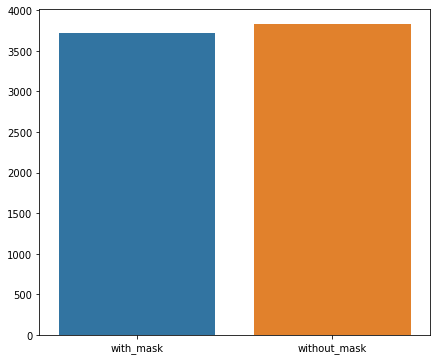

In [ ]:
import seaborn as sns
plt.figure(figsize=(7, 6))
sns.barplot(unique_val,no_of_val)

## Preprocess data and split into train and test data

In [ ]:
def data_process(X,Y):
  lb = LabelBinarizer()
  Y = lb.fit_transform(Y)
  Y = to_categorical(Y)
  x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=10,stratify=Y)
  return x_train,x_test,y_train,y_test

In [ ]:

x_train,x_test,y_train,y_test = data_process(X,Y)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6042, 224, 224, 3), (1511, 224, 224, 3), (6042, 2), (1511, 2))

## Define the model

In [ ]:
def our_model():
  baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
  headModel = baseModel.output
  headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
  headModel = Flatten(name="flatten")(headModel)
  headModel = Dense(128, activation="relu")(headModel)
  headModel = Dropout(0.5)(headModel)
  headModel = Dense(2, activation="softmax")(headModel)
  model = Model(inputs=baseModel.input, outputs=headModel)
  for layer in baseModel.layers:
	  layer.trainable = False
  return model

In [ ]:
model = our_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

## Initialize the hyperparameter and train the model

In [ ]:
INIT_LR = 0.0001
EPOCHS = 20
BS = 32
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
History = model.fit(
	x_train,y_train,
	steps_per_epoch=len(x_train) // BS,
	validation_data=(x_test,y_test),
  validation_steps=len(x_test) // BS,
	epochs=20)


Epoch 1/20
188/188 [==============================] - 14s 60ms/step - loss: 0.2622 - accuracy: 0.9127 - val_loss: 0.0766 - val_accuracy: 0.9801
Epoch 2/20
188/188 [==============================] - 9s 46ms/step - loss: 0.0833 - accuracy: 0.9775
Epoch 3/20
188/188 [==============================] - 9s 46ms/step - loss: 0.0552 - accuracy: 0.9846
Epoch 4/20
188/188 [==============================] - 9s 47ms/step - loss: 0.0444 - accuracy: 0.9874
Epoch 5/20
188/188 [==============================] - 9s 47ms/step - loss: 0.0377 - accuracy: 0.9901
Epoch 6/20
188/188 [==============================] - 9s 46ms/step - loss: 0.0336 - accuracy: 0.9904
Epoch 7/20
188/188 [==============================] - 9s 47ms/step - loss: 0.0276 - accuracy: 0.9919
Epoch 8/20
188/188 [==============================] - 9s 47ms/step - loss: 0.0236 - accuracy: 0.9940
Epoch 9/20
188/188 [==============================] - 9s 47ms/step - loss: 0.0221 - accuracy: 0.9937
Epoch 10/20
188/188 [===========================

## Visualization of accuracy and loss with epoch

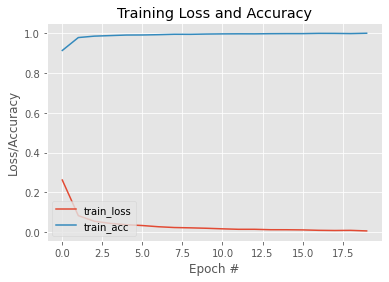

In [ ]:
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), History.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), History.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

## Save the model

In [ ]:
model.save("/content/gdrive/MyDrive/data/model/", save_format="h5")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/data/assets


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/gdrive/MyDrive/data/model/face_detection_model.h5")

## Classification report for our model

In [ ]:
from sklearn.metrics import classification_report
def model_test(model,x_test,y_test):
  predict= model.predict(x_test, batch_size=85)
  predict = np.argmax(predict, axis = 1)
  print(classification_report(y_test.argmax(axis=1), predict))





In [ ]:
model_test(model,x_test,y_test)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       745
           1       0.99      1.00      0.99       766

    accuracy                           0.99      1511
   macro avg       0.99      0.99      0.99      1511
weighted avg       0.99      0.99      0.99      1511

